In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

import random
#import memory_profiler
import altair as alt
from tqdm import tqdm
import datetime

USE_ALL_STOCK_IDS = True
TEST_SIZE = 0.25

import os
ENV_HOME = True
if os.environ.get('USER') == 'ian':
    import ipython_memory_usage
    %ipython_memory_usage_start
else:
    assert USE_ALL_STOCK_IDS, "Must use all stocks if on Kaggle platform"
    ENV_HOME = False
    # kaggle notes:
    # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
    # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 133.52 MiB


In [2]:
# OR PASTE IN UTILITY CODE HERE FOR KAGGLE
from utility import make_unique_time_ids, get_data, get_training_stock_ids
from utility import ROOT, TEST_CSV


Utility says ROOT is /home/ian/data/kaggle/optiver_volatility/
In [2] used 0.2461 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 133.76 MiB


## Load train set

In [3]:
stock_ids = get_training_stock_ids('book_train.parquet') # all stocks by default
if not USE_ALL_STOCK_IDS:
    # choose a random subset
    print("Using a subset")
    random.shuffle(stock_ids)
    stock_ids = stock_ids[:30]

In [3] used 0.2227 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 133.98 MiB


In [4]:
if 'df_train_all' not in dir():
    # only reload if necessary
    print(f"Loading {len(stock_ids)} stocks")
    df_train_all, df_book_train = get_data(stock_ids=stock_ids)
    
    df_train_all = df_train_all.set_index(['stock_id', 'time_id'])
    #df_train_all

Loading 112 stocks
There are 112 items in the folder and they look like ['stock_id=59', 'stock_id=58', 'stock_id=23', 'stock_id=17', 'stock_id=109']
Loaded 167,253,289 rows for book_train on 112 stock_ids
Kept all training rows during get_data
In [4] used 12573.8086 MiB RAM in 8.66s, peaked 573.07 MiB above current, total RAM usage 12707.79 MiB


In [5]:
#df_book_train.query('stock_id==26').shape

In [5] used -2.0039 MiB RAM in 0.10s, peaked 2.00 MiB above current, total RAM usage 12705.79 MiB


In [6]:
#df_book_train.query('stock_id==26').info(memory_usage="deep")

In [6] used -2.2461 MiB RAM in 0.11s, peaked 2.25 MiB above current, total RAM usage 12703.54 MiB


In [7]:
#df_book_train.info(memory_usage="deep")

In [7] used -8.4688 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 12695.07 MiB


In [8]:
all_time_ids = df_book_train.time_id.unique()
np.random.shuffle(all_time_ids) # shuffle the time_ids
print(f"We have {len(all_time_ids):,} time ids")
time_ids_train, time_ids_test = make_unique_time_ids(all_time_ids, test_size=TEST_SIZE)
assert len(time_ids_train) + len(time_ids_test) == len(all_time_ids)
assert len(time_ids_train.intersection(time_ids_test)) == 0, "Expecting no overlap between train and test time ids"
print(f"Example time ids for training, min first: {sorted(list(time_ids_train))[:5]}")

We have 3,830 time ids
Taking 2872 for train
Example time ids for training, min first: [11, 31, 62, 72, 97]
In [8] used -4094.8086 MiB RAM in 1.29s, peaked 3920.25 MiB above current, total RAM usage 8600.27 MiB


In [9]:
df_train_all.sample(5)

,,target
stock_id,time_id,
83,16235,0.003963
40,16479,0.003933
42,985,0.002974
80,11374,0.008048
5,28761,0.007388


In [9] used -887.8984 MiB RAM in 0.12s, peaked 580.16 MiB above current, total RAM usage 7712.37 MiB


In [10]:
df_train_all.reset_index()['time_id'].value_counts().describe()

count    3830.000000
mean      111.992689
std         0.085201
min       111.000000
25%       112.000000
50%       112.000000
75%       112.000000
max       112.000000
Name: time_id, dtype: float64

In [10] used -629.3867 MiB RAM in 0.14s, peaked 540.03 MiB above current, total RAM usage 7082.98 MiB


In [11]:
if USE_ALL_STOCK_IDS:
    assert len(stock_ids) == 112
    if not (df_train_all.groupby('time_id').count().max()[0] == 112 and \
      df_train_all.groupby('time_id').count().min()[0] == 111):
        display(df_train_all.groupby('time_id').count().agg(['max', 'min']))
        raise Warning('Odd! Expecting 111-112')

In [11] used -408.2852 MiB RAM in 0.12s, peaked 408.29 MiB above current, total RAM usage 6674.70 MiB


In [12]:
df_train_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 428932 entries, (0, 5) to (126, 32767)
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  428932 non-null  float64
dtypes: float64(1)
memory usage: 4.7 MB
In [12] used -283.6055 MiB RAM in 0.12s, peaked 283.61 MiB above current, total RAM usage 6391.09 MiB


In [13]:
df_train_all.head()

target
stock_id time_id          
0        5        0.004136
         11       0.001445
         16       0.002168
         31       0.002195
         62       0.001747

In [13] used -173.5664 MiB RAM in 0.11s, peaked 173.57 MiB above current, total RAM usage 6217.52 MiB


# Overview

In [14]:
print(df_train_all.shape)
df_train_all.head()

(428932, 1)


target
stock_id time_id          
0        5        0.004136
         11       0.001445
         16       0.002168
         31       0.002195
         62       0.001747

In [14] used -82.3242 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 6135.20 MiB


In [15]:
df_train_all.reset_index().stock_id.value_counts().describe()

count     112.000000
mean     3829.750000
std         1.700556
min      3815.000000
25%      3830.000000
50%      3830.000000
75%      3830.000000
max      3830.000000
Name: stock_id, dtype: float64

In [15] used -11.1523 MiB RAM in 0.14s, peaked 0.00 MiB above current, total RAM usage 6124.05 MiB


In [16]:
df_train_all.reset_index().time_id.value_counts().describe()

count    3830.000000
mean      111.992689
std         0.085201
min       111.000000
25%       112.000000
50%       112.000000
75%       112.000000
max       112.000000
Name: time_id, dtype: float64

In [16] used 0.0195 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 6124.07 MiB


In [17]:
df_train_all.reset_index().query('stock_id < 10').groupby('stock_id')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
stock_id,,,,,,,,
0,3830.0,0.004028,0.002855,0.000594,0.002246,0.003180,0.004827,0.036311
1,3830.0,0.004362,0.002433,0.000885,0.002629,0.003719,0.005407,0.020951
2,3830.0,0.002385,0.002339,0.000394,0.001310,0.001748,0.002458,0.024848
3,3830.0,0.006182,0.003201,0.000746,0.004010,0.005422,0.007576,0.038606
4,3830.0,0.004197,0.002879,0.000810,0.002449,0.003397,0.004928,0.025648
5,3830.0,0.005170,0.003096,0.000605,0.003158,0.004332,0.006165,0.026358
6,3830.0,0.006923,0.003323,0.000840,0.004617,0.006216,0.008387,0.031468
7,3830.0,0.003288,0.002129,0.000521,0.002006,0.002770,0.003876,0.022414
8,3830.0,0.004320,0.002709,0.000899,0.002484,0.003568,0.005282,0.028987


In [17] used 0.4688 MiB RAM in 0.19s, peaked 0.00 MiB above current, total RAM usage 6124.54 MiB


In [18]:
df_sample = df_train_all.reset_index().query('stock_id < 10').sample(5000)[['stock_id', 'target']]
alt.Chart(df_sample).mark_boxplot().encode(
    x='stock_id:O',
    y='target:Q'
)

alt.Chart(...)

In [18] used 1.0977 MiB RAM in 0.23s, peaked 0.50 MiB above current, total RAM usage 6125.63 MiB


# Features

In [19]:
df_book_train.shape

(167253289, 11)

In [19] used 0.1445 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 6125.78 MiB


In [20]:
df_book_train.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [20] used -2.7109 MiB RAM in 0.11s, peaked 2.71 MiB above current, total RAM usage 6123.07 MiB


In [21]:
#df_book_train.sample(5)

In [21] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 6123.07 MiB


In [22]:
df_book_train.query('stock_id==0 and time_id==8585').shape

(291, 11)

In [22] used 1275.6289 MiB RAM in 7.95s, peaked 5257.76 MiB above current, total RAM usage 7398.70 MiB


In [23]:
df_book_train.query('stock_id==0 and time_id==8585').head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
246645,8585,0,1.000319,1.001056,1.000074,1.001645,90,39,300,127,0
246646,8585,1,1.000319,1.001056,1.000074,1.001645,90,43,100,127,0
246647,8585,2,1.000319,1.001056,1.000074,1.001645,90,4,100,166,0
246648,8585,3,1.000319,1.001056,1.000074,1.001645,90,3,100,166,0
246649,8585,5,1.000319,1.001056,1.000074,1.001645,90,3,100,248,0


In [23] used -0.3945 MiB RAM in 5.29s, peaked 5191.75 MiB above current, total RAM usage 7398.30 MiB


In [24]:
df_book_train.groupby('stock_id').groups[stock_ids[0]]

Int64Index([109999701, 109999702, 109999703, 109999704, 109999705, 109999706,
            109999707, 109999708, 109999709, 109999710,
            ...
            111323075, 111323076, 111323077, 111323078, 111323079, 111323080,
            111323081, 111323082, 111323083, 111323084],
           dtype='int64', length=1323384)

In [24] used 606.7266 MiB RAM in 3.31s, peaked 2069.53 MiB above current, total RAM usage 8005.03 MiB


In [25]:
# make feature columns
cols = ['bid_price1', 'ask_price1']
def make_features_var1(df_book):
    features_var1 = df_book.groupby(['stock_id', 'time_id'])[cols].var()
    features_var1_col_names = [f"{col}_var" for col in cols]
    features_var1.columns = features_var1_col_names
    #features_var1
    return features_var1
    
features_var1 = make_features_var1(df_book_train)
features_var1

bid_price1_var  ask_price1_var
stock_id time_id                                
0        5          3.557702e-07    3.609267e-07
         11         8.048454e-08    4.782809e-08
         16         5.057495e-07    6.204843e-07
         31         4.746649e-07    3.223060e-07
         62         4.740689e-08    3.653909e-08
...                          ...             ...
99       32751      1.999395e-07    1.984993e-07
         32753      3.945513e-07    4.257106e-07
         32758      4.122112e-07    4.117799e-07
         32763      9.529251e-08    9.768070e-08
         32767      4.200461e-08    4.372325e-08

[428960 rows x 2 columns]

In [25] used 29.3555 MiB RAM in 21.36s, peaked 6340.83 MiB above current, total RAM usage 8034.38 MiB


# Merge

In [26]:
train_merged = pd.merge(df_train_all, features_var1, left_index=True, right_index=True)
train_merged

target  bid_price1_var  ask_price1_var
stock_id time_id                                          
0        5        0.004136    3.557702e-07    3.609267e-07
         11       0.001445    8.048454e-08    4.782809e-08
         16       0.002168    5.057495e-07    6.204843e-07
         31       0.002195    4.746649e-07    3.223060e-07
         62       0.001747    4.740689e-08    3.653909e-08
...                    ...             ...             ...
126      32751    0.003461    2.528495e-07    2.074568e-07
         32753    0.003113    1.594177e-06    1.699587e-06
         32758    0.004070    2.470041e-07    1.960531e-07
         32763    0.003357    1.761607e-07    1.756424e-07
         32767    0.002090    1.205763e-07    1.261233e-07

[103409 rows x 3 columns]

In [26] used 39.9062 MiB RAM in 0.51s, peaked 0.00 MiB above current, total RAM usage 8074.29 MiB


In [27]:
features = train_merged.drop(columns='target').columns

In [27] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 8074.29 MiB


In [28]:
chs = []
for feature in features:
    print(f"Making {feature}")
    df_sample = train_merged.reset_index().sample(5_000)
    chs.append(alt.Chart(df_sample).mark_point().encode(x=feature, y='target'))
    
# https://altair-viz.github.io/user_guide/compound_charts.html
alt.vconcat(*chs)

Making bid_price1_var
Making ask_price1_var


alt.VConcatChart(...)

In [28] used 3.1250 MiB RAM in 0.53s, peaked 0.50 MiB above current, total RAM usage 8077.41 MiB


In [29]:
train_merged.reset_index()

,stock_id,time_id,target,bid_price1_var,ask_price1_var
0,0,5,0.004136,3.557702e-07,3.609267e-07
1,0,11,0.001445,8.048454e-08,4.782809e-08
2,0,16,0.002168,5.057495e-07,6.204843e-07
3,0,31,0.002195,4.746649e-07,3.223060e-07
4,0,62,0.001747,4.740689e-08,3.653909e-08
...,...,...,...,...,...
103404,126,32751,0.003461,2.528495e-07,2.074568e-07
103405,126,32753,0.003113,1.594177e-06,1.699587e-06
103406,126,32758,0.004070,2.470041e-07,1.960531e-07
103407,126,32763,0.003357,1.761607e-07,1.756424e-07


In [29] used 0.0000 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 8077.41 MiB


In [30]:
#time_ids_train, time_ids_test
def train_test_split(df, target_col, time_ids_train, time_ids_test):
    X_train = df.query('time_id in @time_ids_train').drop(columns=[target_col, 'time_id'])
    X_test = df.query('time_id in @time_ids_test').drop(columns=[target_col, 'time_id'])
    y_train = df.query('time_id in @time_ids_train')[target_col]
    y_test = df.query('time_id in @time_ids_test')[target_col]
    return X_train, X_test, y_train, y_test

#feature_cols = ['bid_price1_var', 'ask_price1_var', 'stock_id', 'time_id']
#X_train, X_test, y_train, y_test = train_test_split(train_merged.reset_index()[feature_cols+['target']], 'target', time_ids_train, time_ids_test)

feature_cols = ['bid_price1_var', 'ask_price1_var', 'stock_id']
X_train, X_test, y_train, y_test = train_test_split(train_merged.reset_index()[feature_cols+['time_id', 'target']], 'target', time_ids_train, time_ids_test)

In [30] used -0.2266 MiB RAM in 0.13s, peaked 0.23 MiB above current, total RAM usage 8077.19 MiB


In [31]:
X_train.head(3)

,bid_price1_var,ask_price1_var,stock_id
1,8.048454e-08,4.782809e-08,0
3,4.746649e-07,3.223060e-07,0
4,4.740689e-08,3.653909e-08,0


In [31] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 8077.19 MiB


In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77543, 3), (25866, 3), (77543,), (25866,))

In [32] used 0.0078 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 8077.20 MiB


# ML on a train/test split

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [33] used 30.4844 MiB RAM in 0.74s, peaked 0.00 MiB above current, total RAM usage 8107.68 MiB


In [34]:
#est = LinearRegression()
est = RandomForestRegressor(n_estimators=10) # default n_estimators==100

In [34] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 8107.68 MiB


In [35]:
est.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [35] used 0.3984 MiB RAM in 1.91s, peaked 0.00 MiB above current, total RAM usage 8108.08 MiB


In [36]:
print(f"{df_train_all.reset_index().stock_id.unique().shape[0]} unique stock ids, test set is {TEST_SIZE*100:0.1f}%")
print(f"Features:", feature_cols)
score = est.score(X_test, y_test) # r^2
print(f"r^2 score {score:0.3f}")

112 unique stock ids, test set is 25.0%
Features: ['bid_price1_var', 'ask_price1_var', 'stock_id']
r^2 score 0.416
In [36] used 0.0000 MiB RAM in 0.15s, peaked 0.00 MiB above current, total RAM usage 8108.08 MiB


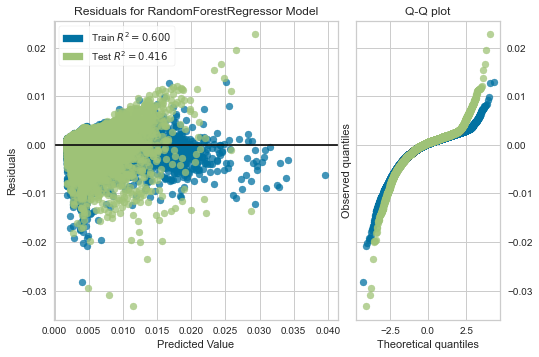

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47] used -479.4375 MiB RAM in 1.76s, peaked 11.11 MiB above current, total RAM usage 6916.87 MiB


In [47]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(est, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()              

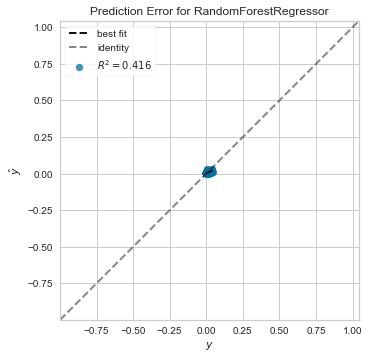

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38] used 1.8867 MiB RAM in 0.61s, peaked 1.07 MiB above current, total RAM usage 8119.16 MiB


In [38]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(est)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()              

In [39]:
if 'feature_importances_' in dir(est):
    feature_col = 'feature_importances_'
if 'coef_' in dir(est):
    feature_col = 'coef_'
df_features = pd.DataFrame(zip(getattr(est, feature_col), feature_cols), columns=['importance', 'feature']).set_index('importance')
df_features.sort_index(ascending=False)

,feature
importance,
0.421802,ask_price1_var
0.372068,bid_price1_var
0.206130,stock_id


In [39] used -0.2461 MiB RAM in 0.12s, peaked 0.25 MiB above current, total RAM usage 8118.91 MiB


# Load test set

In [40]:
%xdel df_book_train

In [40] used -1276.0156 MiB RAM in 0.12s, peaked 1276.02 MiB above current, total RAM usage 6842.90 MiB


# Make predictions

In [41]:
len(stock_ids) # expecting 112

112

In [41] used 0.2344 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 6843.13 MiB


In [42]:
# end of notebook

In [42] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 6843.13 MiB


In [43]:
# make a subset of stocks for local testing
if False:
    stock_ids_for_small_test_set = range(120, 127)
    dfx = df_train_all.query('stock_id in @stock_ids_for_small_test_set')
    ser_row_id = dfx.reset_index()[['stock_id', 'time_id']].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
    dfx2 = dfx.reset_index()
    dfx2['row_id'] = ser_row_id
    dfx2.to_csv('test_local.csv', index=False)

In [43] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 6843.13 MiB


In [44]:
if True: # True if debugging
    # book train as a substitute
    df_test_all = pd.read_csv(os.path.join(ROOT, 'test_local.csv'))
    df_test_all = df_test_all.rename(columns={'target': 'train_target'})
    TEST_FOLDER = 'book_test_local.parquet'
    
    assert ENV_HOME == True
else:
    df_test_all = pd.read_csv(TEST_CSV)
    if df_test_all.shape[0] == 3: # kaggle test data
        df_test_all = df_test_all[:1] # cut out 2 rows so predictions work    
    df_test_all = df_test_all.set_index(['stock_id', 'time_id'])
    TEST_FOLDER = 'book_test.parquet'
df_test_all = df_test_all.set_index(['stock_id', 'time_id'])


In [44] used -0.0117 MiB RAM in 0.15s, peaked 0.01 MiB above current, total RAM usage 6843.12 MiB


In [45]:
test_set_predictions = []
stock_ids_test = get_training_stock_ids(TEST_FOLDER) # all stocks by default

df_test_predictions = pd.DataFrame() # prediction set to build up
for stock_id in tqdm(stock_ids_test):
    parquet_filename = os.path.join(ROOT, f'{TEST_FOLDER}/stock_id={stock_id}')
    #print(f"reading {parquet_filename}")
    df_book_test_stock_X = pd.read_parquet(parquet_filename)
    df_book_test_stock_X['stock_id'] = stock_id
    features_var1_test = make_features_var1(df_book_test_stock_X)
    
    df_test_all_X = df_test_all.query('stock_id==@stock_id').copy()
    test_merged = pd.merge(df_test_all_X, features_var1_test, left_index=True, right_index=True)
    test_set_predictions_X = est.predict(test_merged.reset_index()[list(features) + ['stock_id']])
    df_test_all_X['target'] = test_set_predictions_X
    df_test_predictions = pd.concat((df_test_predictions, df_test_all_X))
    
assert df_test_all.shape[0] == df_test_predictions.shape[0], "Expecting all rows to be predicted"

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.03it/s]

In [45] used 661.9961 MiB RAM in 2.08s, peaked 78.47 MiB above current, total RAM usage 7505.12 MiB


In [46]:
print(f"Writing {df_test_predictions.shape[0]} rows to submission.csv on {datetime.datetime.utcnow()}")
df_test_predictions.reset_index()[['row_id', 'target']].to_csv('submission.csv', index=False)

Writing 22980 rows to submission.csv on 2021-07-28 12:54:30.411978
In [46] used -108.8125 MiB RAM in 0.18s, peaked 97.35 MiB above current, total RAM usage 7396.30 MiB
